In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import csv
#importing the required modues

In [2]:
nRowsRead = 100000 # specify 'None' if want to read whole file
initialDataFrame = pd.read_csv('Dataset.csv', delimiter=',', nrows = nRowsRead)
initialDataFrame.dataframeName = 'Dataset.csv'
nRow, nCol = initialDataFrame.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 100000 rows and 87 columns


In [3]:
initialDataFrame[:]

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0,0,0.0,0.0,0,0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,...,0.0,0,0,0.0,0.0,0,0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0,0,0.0,0.0,0,0,BENIGN,131,HTTP_PROXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,192.168.205.131-10.200.7.6-54082-3128-6,10.200.7.6,3128,192.168.205.131,54082,6,26/04/201711:14:24,404,1,1,...,0.0,0,0,0.0,0.0,0,0,BENIGN,7,HTTP
99996,10.200.7.217-91.216.63.241-37416-80-6,10.200.7.217,37416,91.216.63.241,80,6,26/04/201711:14:42,309,1,2,...,0.0,0,0,0.0,0.0,0,0,BENIGN,7,HTTP
99997,172.217.29.69-10.200.7.194-443-35657-6,172.217.29.69,443,10.200.7.194,35657,6,26/04/201711:16:37,148,1,1,...,0.0,0,0,0.0,0.0,0,0,BENIGN,126,GOOGLE
99998,192.168.29.55-10.200.7.8-61690-3128-6,192.168.29.55,61690,10.200.7.8,3128,6,26/04/201711:15:31,82,1,2,...,0.0,0,0,0.0,0.0,0,0,BENIGN,126,GOOGLE


In [4]:
initialDataFrame.dropna(inplace = True) #Drop rows/column with null values 

In [5]:
initialDataFrame.drop(columns =["Timestamp", "Label"], inplace = True) #Drop columns Timestamp and Label
'''We will generate our own labels later'''

'We will generate our own labels later'

In [6]:
initialDataFrame.columns


Index(['Flow.ID', 'Source.IP', 'Source.Port', 'Destination.IP',
       'Destination.Port', 'Protocol', 'Flow.Duration', 'Total.Fwd.Packets',
       'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets',
       'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max',
       'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean',
       'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max',
       'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean',
       'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s',
       'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min',
       'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max',
       'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std',
       'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Bwd.PSH.Flags',
       'Fwd.URG.Flags', 'Bwd.URG.Flags', 'Fwd.Header.Length',
       'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean',
       'Packet.

In [7]:
dataFrame = initialDataFrame #Copy the data frame


In [8]:
#Drop Sorce and Destination IP and Ports, they can be included when there is a requirment of regional classification 
dataFrame.drop(columns =["Source.IP", "Source.Port", "Destination.IP", "Destination.Port"], inplace = True) 
'''As input datasets used is gathered from a single location these fields add no siginificance to the model'''

'As input datasets used is gathered from a single location these fields add no siginificance to the model'

In [9]:
labelEncoder = LabelEncoder() #creating a lable encoder object
#inserting colunm named label with encoded values of Protocol Name
dataFrame["labels"] = labelEncoder.fit_transform(dataFrame["ProtocolName"]) 
archiveFrame = dataFrame[["ProtocolName", "labels"]]
print(archiveFrame)
archiveFrame = archiveFrame.drop_duplicates(keep='last')
archiveFrame.to_csv('ProtocolsAndLabels.csv')

       ProtocolName  labels
0        HTTP_PROXY      18
1        HTTP_PROXY      18
2              HTTP      15
3              HTTP      15
4        HTTP_PROXY      18
...             ...     ...
99995          HTTP      15
99996          HTTP      15
99997        GOOGLE      13
99998        GOOGLE      13
99999  HTTP_CONNECT      16

[100000 rows x 2 columns]


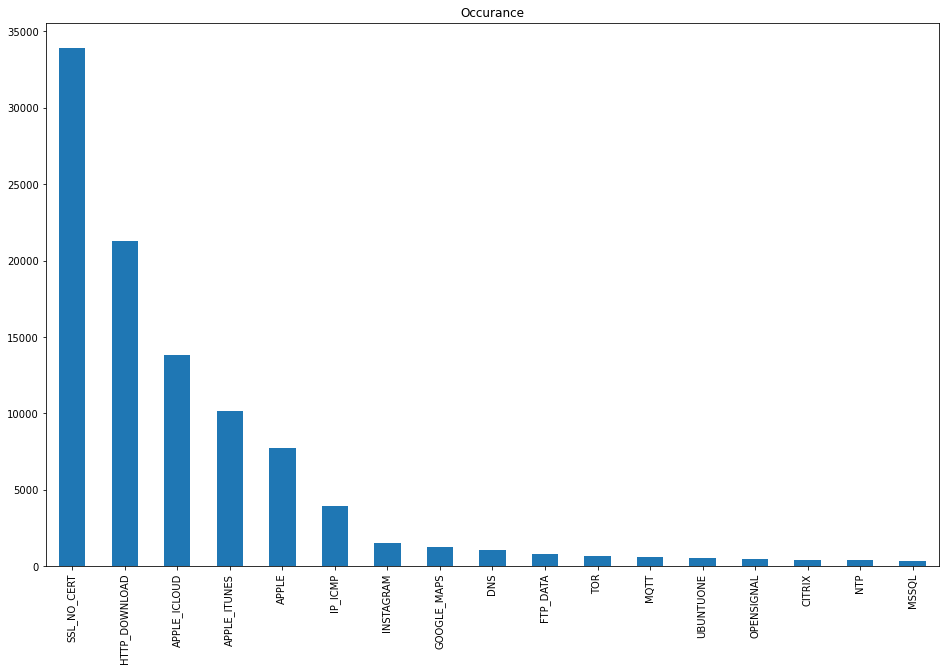

In [10]:
targetCount = dataFrame['ProtocolName'].value_counts()
plt.figure(figsize=(16,10))
targetCount.plot(kind='bar', title='Occurance');
plt.savefig("PopularOccurances.png")
targetCount[23:].plot(kind='bar', title='Occurance');
plt.savefig("ModrateOccurances.png")
#targetCount[56:].plot(kind='bar', title='Occurance');
#plt.savefig("LowestOccurances.png")

In [11]:
# Removing FlowID and ProtocolName
dataFrame.drop(columns = ["Flow.ID", "ProtocolName"], inplace = True) 

In [12]:
protocolLabels = dataFrame.iloc[:,-1] #extrecting only the labels of protol occurances 
#splitting our data frame into testing and training dataframes.
x_train, x_test, y_train, y_test = train_test_split(dataFrame, protocolLabels, test_size=0.2)
x_train.to_csv("xTrain.csv")
y_train.to_csv("yTrain.csv")
x_test.to_csv("xTest.csv")
y_test.to_csv("yTest.csv")

In [13]:
classifier=RandomForestClassifier(n_estimators = 100) # n_estimators - The number of trees in the forest
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [14]:
predictions = classifier.predict(x_test)
predictionsDataFrame = pd.DataFrame(predictions)
predictionsDataFrame.to_csv("Predictions.csv")

In [15]:
classifier.score(x_test, y_test)

0.98955

[[308   0   0 ...   0   0   0]
 [  0   2   0 ...   0   0   0]
 [  3   0   5 ...   0   0   0]
 ...
 [  0   0   0 ... 178   0   0]
 [  0   0   0 ...   0 101   4]
 [  0   0   0 ...   0   0 780]]


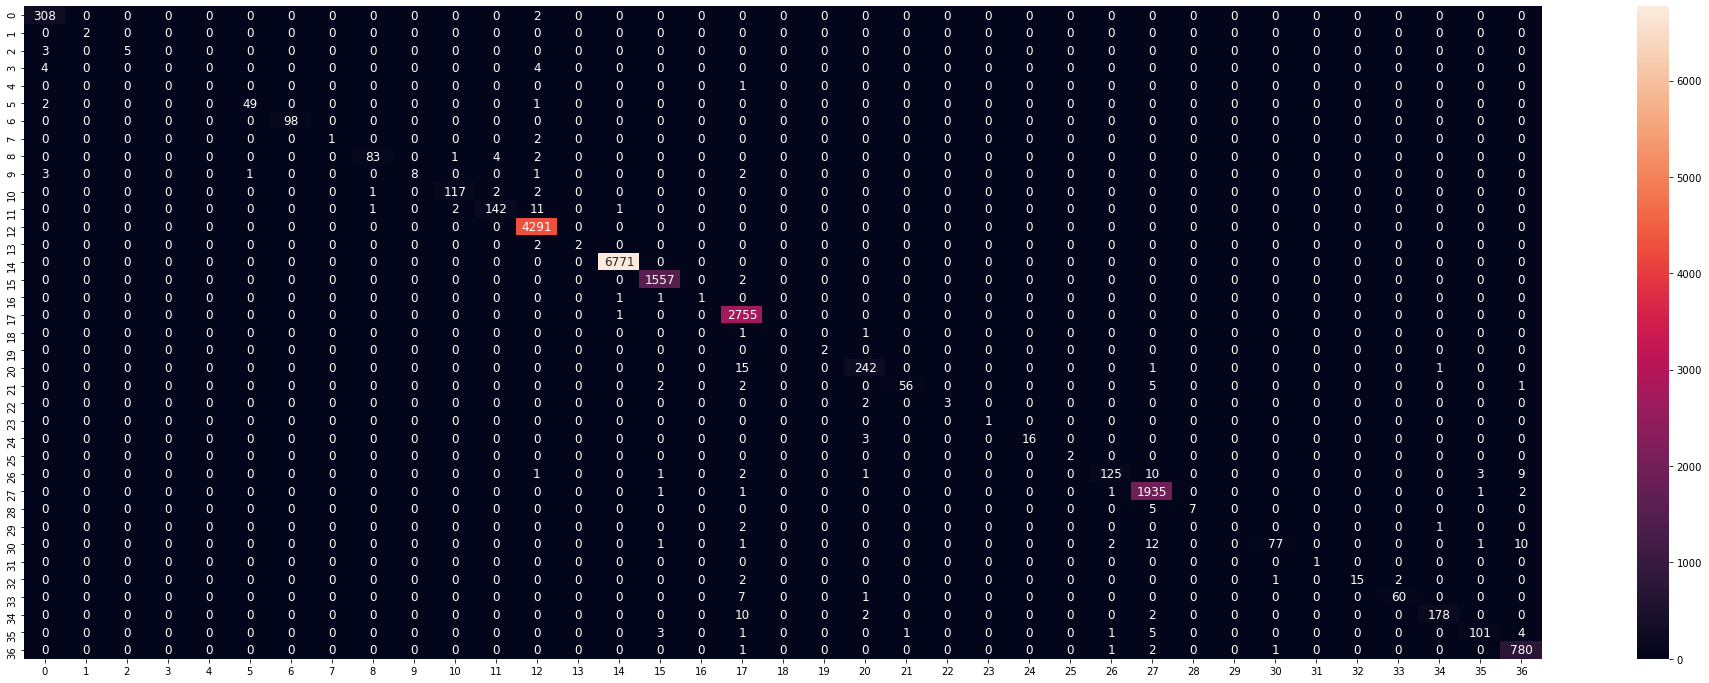

In [16]:
# Scaling the variables
scaler_x = StandardScaler()
x_train = scaler_x.fit_transform(x_train)
x_train = scaler_x.transform(x_test)

# Predicting the test set results
y_prediction = classifier.predict(x_test)


# Making the confusion matrix
conMat = confusion_matrix(y_true=y_test, y_pred=y_prediction)
confusionDataFrame = pd.DataFrame(conMat)
confusionDataFrame.to_csv("ConfusionMatrix.csv")

fig, ax = plt.subplots(figsize=(34,12)) 
sns.heatmap(conMat,annot=True, ax=ax, fmt='d', annot_kws={"size": 12})
plt.savefig("ConfusionMatrix.png")

print(conMat)